# Back to basics
> A detailed look at fully connected neural networks

Now that we have a decent understanding of the surrounding infrastructure of neural networks we can take a deeper look at how they work. This week we will look at **Fully Connected Networks**, commonly called **FCNs** or **MLPs**. 

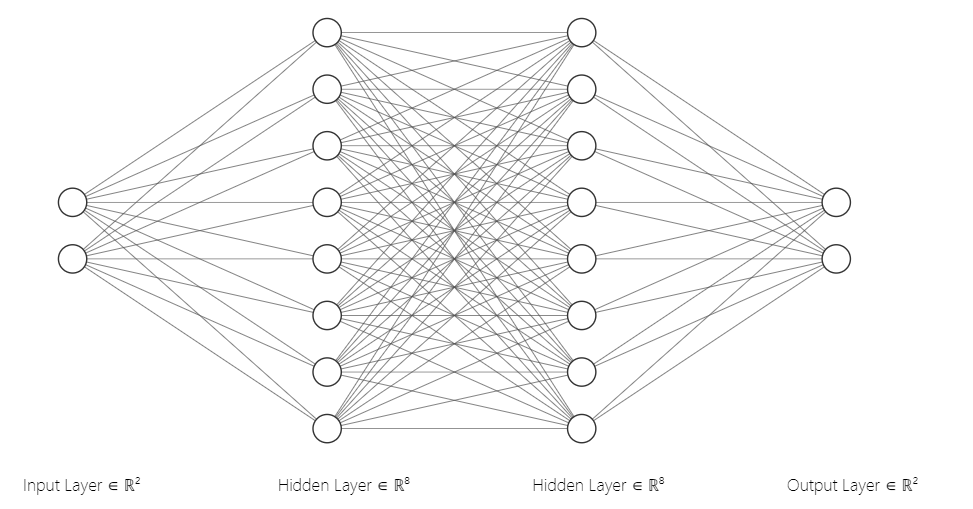

## Terminology
For a simple MLP we have three types of layers
1. The input layer. Each node is a dimension of our input (a 28*28 grayscale image would have 784 input nodes!)
2. Hidden layers. Where all the processing takes place, can be written as a matrix multiplication
3. The output layer. One node per dimension of the output space. For a binary classification task we would have two nodes.



## Mathematics of a simple MLP

We will look at an example of a simple "3-layer" MLP. We usually include the input and output layers in this count, so this would have a single input layer, a single hidden layer, and a single output layer.

In our example we will be classifying points into two categories using their x and y position. 

Specifically we will be using a point set like this:

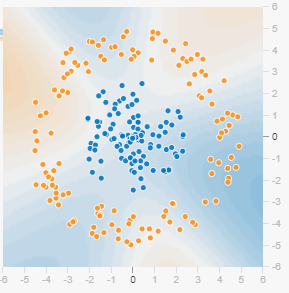

Say we have a three layer MLP with a hidden layer which uses six units. What is the size of this model?



## Model Architecture


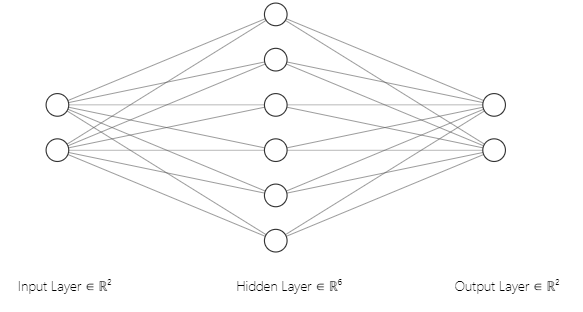

###Matrix Math

**Input Layer**
$$data = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}
$$

**Input to Hidden**
$$hidden_1 = \begin{bmatrix}
h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} & h_{1,5} & h_{1,6}\\
h_{2,1} & h_{2,2} & h_{2,3} & h_{2,4} & h_{2,5} & h_{1,6}\\
\end{bmatrix}
$$

**Hidden to Output**
$$hidden_2 = \begin{bmatrix}
h_{1,1} & h_{1,2}\\
h_{2,1} & h_{2,2}\\
h_{3,1} & h_{3,2}\\
h_{4,1} & h_{4,2}\\
h_{5,1} & h_{5,2}\\
h_{6,1} & h_{6,2}\\
\end{bmatrix}
$$


**Output Layer**
$$output = \begin{bmatrix}
o_1 & o_2
\end{bmatrix} 
$$
**All together**
$$\begin{bmatrix}
o_1 & o_2
\end{bmatrix} = \begin{bmatrix}
x_1 & x_2
\end{bmatrix}
\begin{bmatrix}
h_{1,1} & h_{1,2} & h_{1,3} & h_{1,4} & h_{1,5} & h_{1,6}\\
h_{2,1} & h_{2,2} & h_{2,3} & h_{2,4} & h_{2,5} & h_{1,6}\\
\end{bmatrix}
\begin{bmatrix}
h_{1,1} & h_{1,2}\\
h_{2,1} & h_{2,2}\\
h_{3,1} & h_{3,2}\\
h_{4,1} & h_{4,2}\\
h_{5,1} & h_{5,2}\\
h_{6,1} & h_{6,2}\\
\end{bmatrix}
$$

Whats missing??

Space for spoiler free teaching.....
![image](https://miro.medium.com/max/1000/0*qSOZARD3hOzJL7Kd.jpg)

The non-linearity of course!!

Non-linearities are super important. They are the difference between wasteful mat muls and useful computations. 

Quick demo to hammer it in.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.uniform(size=[1, 2])
hidden_1 = np.random.uniform(size=[2, 6])
hidden_2 = np.random.uniform(size=[6, 2])

In [34]:
hidden_state = data@hidden_1
output = hidden_state@hidden_2
output

array([[1.43921713, 1.59712418]])

In [35]:
# but what if we "pre-computed" the transformation of the hidden layer
fake_hidden = hidden_1@hidden_2
fake_output = data@fake_hidden
fake_output

array([[1.43921713, 1.59712418]])

In [42]:
# the power of the non-linearity
non_linear = lambda x: np.tanh(x)
hidden_state = non_linear(data@hidden_1)
output = hidden_state@hidden_2
output

array([[1.35446021, 1.48909076]])

## Binary Classification Exercise
1. Build a model using the architecture we described above using keras
2. Train the model both with and without the non-linearity on the hidden layer for 25 epochs (no GPU necessary)
3. Evaluate the model on the provided test data

**Remember that your output layer needs a softmax activation**

Useful code snippets
```
# imports
import tensorflow as tf

# layers
input_layer = tf.keras.layers.Input(input_size)
linear_layer = tf.keras.layers.Dense(hidden_size)
nonlinear_layer = tf.keras.layers.Dense(hidden_size, activation='tanh')
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# model summary
model.summary()

# compiling/training
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])
model.fit(train_x_data, train_y_data, batch_size=batch_size, epochs=epochs)

# one-hot encoding
one_hot_labels = np.eye(num_classes)[class_indices]
```

linear loss ~= 0.6930


non-linear loss ~= 0.4266

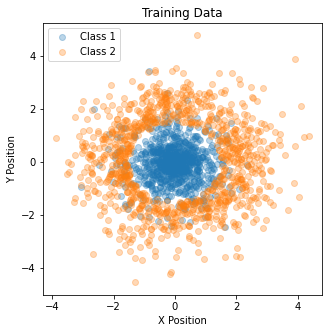

In [66]:
training_examples = 1000
testing_examples = 100

def generate_points(class_number, amount, mixing=1.5):
    # class number is either 1 or 2
    assert class_number in [1,2]
    amplitude = np.abs(np.random.normal(0, 1, size=amount)) + (class_number - 1)*mixing
    angle = np.random.uniform(0, 2*np.pi, size=amount)
    points = np.stack([amplitude*np.cos(angle), amplitude*np.sin(angle)], axis=-1)
    return points

class_1_data_train = generate_points(1, training_examples)
class_2_data_train = generate_points(2, training_examples)

class_1_data_test = generate_points(1, testing_examples)
class_2_data_test = generate_points(2, testing_examples)

plt.figure(figsize=(5,5))
plt.scatter(class_1_data_train[:, 0], class_1_data_train[:, 1], label='Class 1', alpha=0.3)
plt.scatter(class_2_data_train[:, 0], class_2_data_train[:, 1], label='Class 2', alpha=0.3)
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Training Data")
plt.legend()

Now that you've done it by hand. Lets take a look at some examples from Tensorflow's website. Each of these links will take you to a specific configuration. Press play to watch the optimizer do it's thing. 

1.  [Linear visualization](https://playground.tensorflow.org/#activation=linear&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.46980&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
2. [Tanh visualization](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.46980&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Now we will move to a more advanced example. Classifying spiral data. You can see the example here:
[Spiral Data](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=6&seed=0.10492&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

Try it out and see how we can't use our old model to do the classification.


### Exercise
This exercise is in two parts:

**Part 1**

Without changing the inputs to the model on the tensorflow website create an architecture that achieves a loss of less than 0.05 on training and testing.
- Experiment with different activation functions
- Try adding more units to the hidden layers and adding more hidden layers

**Part 2**

Implement your best model using keras. Use the code provided to generate training/test sets.

Text(0, 0.5, 'Y Position')

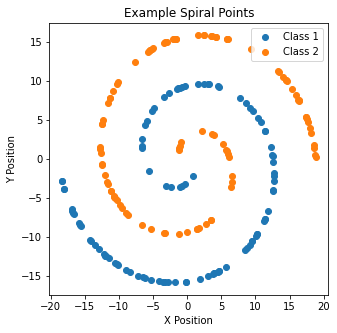

In [106]:
def create_spiral_points(class_number, amount):
    assert class_number in [1,2]
    theta = np.sqrt(np.random.rand(amount))*3*np.pi
    if class_number == 1:
        radius = 2*theta
    else:
        radius = -2*theta
    data = np.array([np.cos(theta)*radius, np.sin(-theta)*radius]).T
    return data

# example usage
spiral_points_class_1 = create_spiral_points(1, 100)
spiral_points_class_2 = create_spiral_points(2, 100)

plt.figure(figsize=(5,5))
plt.scatter(spiral_points_class_1[:, 0], spiral_points_class_1[:,1], label="Class 1")
plt.scatter(spiral_points_class_2[:, 0], spiral_points_class_2[:,1], label="Class 2")
plt.legend()
plt.title("Example Spiral Points")
plt.xlabel("X Position")
plt.ylabel("Y Position")

## Dealing with noise
Does your model stand up to noise?

- Max out the noise setting on the tensorflow website. How does performance change?
- Can you reach 0.05 loss with this noisy data?

**Tips**
- If you start seeing your results wildly fluctuate pause and reduce the learning rate.
- Going deeper doesn't work with some activation functions because of the vanishing gradient problem

**Now do it in keras** 

Luckily adaptive optimizers are better at this and you won't need to reduce your learning rate.

My model did it in about 150 epochs on 1000 training examples


Text(0, 0.5, 'Y Position')

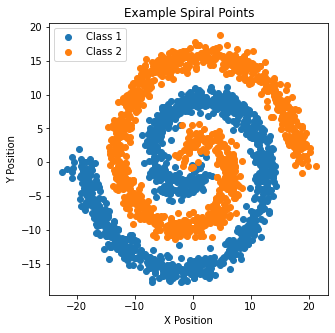

In [109]:
def create_spiral_points_noise(class_number, amount):
    assert class_number in [1,2]
    theta = np.sqrt(np.random.rand(amount))*3*np.pi
    if class_number == 1:
        radius = 2*theta
    else:
        radius = -2*theta
    data = np.array([np.cos(theta)*radius, np.sin(-theta)*radius]).T
    data += np.random.randn(amount, 2)
    return data

noise_points_class_1 = create_spiral_points_noise(1, 1000)
noise_points_class_2 = create_spiral_points_noise(2, 1000)

plt.figure(figsize=(5,5))
plt.scatter(noise_points_class_1[:, 0], noise_points_class_1[:,1], label="Class 1")
plt.scatter(noise_points_class_2[:, 0], noise_points_class_2[:,1], label="Class 2")
plt.legend()
plt.title("Example Spiral Points")
plt.xlabel("X Position")
plt.ylabel("Y Position")

## Bonus Exercise
It's pretty cool that the tensorflow website creates a "map" of the classification for each part of the input space. Generate a similar map using your model.

**Some tips**

- Since is a binary classification task you know that the confidence of one class is 1 -  confidence of another. How can you use this?
- You can treat any array as an image and plot it with a colormap
```
plt.imshow(data, cmap='bwr')
```
- You can generate a bunch of x,y pairs covering your space using meshgrid

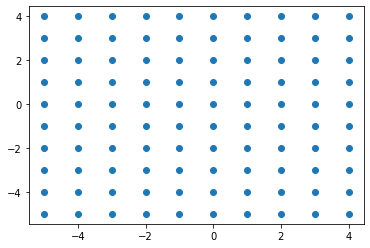

In [144]:
# meshgrid example
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=False)
plt.scatter(xx.flatten(), yy.flatten())